**We will try 3 types of models - **
1. BOW model, Tf-idf
2. Word embeddings (GLOVE, Word2Vec, FastText)
3. RNN, LSTM, BiDirectional GRU, SImple RNN, Stacked LSTM

**Experiment 1 **

1. Mix all the paragraphs and split the data to a 80-20 split
2. Build the 3 models listed earlier and compute the confusion matrix for the training and testing datasets.
3. Discuss how your models perform.


In [1]:
import pandas as pd
import keras 
from keras.preprocessing.text import text_to_word_sequence
from keras.activations import relu
from keras.optimizers import adam, adadelta
from keras.layers import Dense, Dropout
from keras.preprocessing.sequence import pad_sequences
from nltk.tokenize import word_tokenize

C:\Users\nikhi\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


** Bag of Words for feature extraction**

In [2]:
transcript = pd.read_csv('Earnings_Call_Transcript.csv')
transcript.drop(columns='Unnamed: 0', axis=1).head()

,sentiment,text
0,positive,thank good welcome conference call fourth quar...
1,positive,look past expect channel inventory correction ...
2,neutral,last question come line harlan sur jp
3,negative,china game slow economic environment governmen...
4,negative,know could tear tease know consumer market rel...


In [3]:
transcript['text'].describe()

count         1618
unique        1492
top       operator
freq            28
Name: text, dtype: object

In [4]:
transcript['sentiment'].describe()

count        1644
unique          3
top       neutral
freq          833
Name: sentiment, dtype: object

In [5]:
transcript['sentiment'].value_counts()

neutral     833
positive    654
negative    157
Name: sentiment, dtype: int64

In [6]:
tokens = text_to_word_sequence(transcript['text'][0])
tokens

['thank',
 'good',
 'welcome',
 'conference',
 'call',
 'fourth',
 'quarter',
 'fiscal',
 'call',
 'today',
 'nvidia',
 'president',
 'chief',
 'executive',
 'officer',
 'colette',
 'executive',
 'vice',
 'president',
 'chief',
 'financial',
 'like',
 'remind',
 'call',
 'webcast',
 'live',
 'investor',
 'relation',
 'web']

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

#vec = TfidfVectorizer(analyzer='word'
 #               ,max_features=3000)
##X = vec.fit_transform(transcript['text'].astype('str')).toarray()
#X

In [29]:
vec = TfidfVectorizer(analyzer='word'
                ,max_features=3000)
X = vec.fit_transform(transcript['text'].astype('str').tolist())
X

<1644x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 36165 stored elements in Compressed Sparse Row format>

In [30]:
X.shape

(1644, 3000)

In [31]:
vec.vocabulary_

{'thank': 2603,
 'good': 1130,
 'welcome': 2925,
 'conference': 545,
 'call': 372,
 'fourth': 1036,
 'quarter': 1942,
 'fiscal': 980,
 'today': 2649,
 'nvidia': 1679,
 'president': 1870,
 'chief': 426,
 'executive': 902,
 'officer': 1693,
 'colette': 475,
 'vice': 2851,
 'financial': 970,
 'like': 1466,
 'remind': 2032,
 'webcast': 2915,
 'live': 1479,
 'investor': 1378,
 'relation': 2019,
 'web': 2914,
 'look': 1490,
 'past': 1774,
 'expect': 907,
 'channel': 414,
 'inventory': 1374,
 'correction': 605,
 'behind': 298,
 'business': 361,
 'full': 1064,
 'year': 2983,
 'game': 1083,
 'slightly': 2311,
 'give': 1118,
 'tough': 2665,
 'first': 979,
 'half': 1180,
 'compare': 510,
 'growth': 1169,
 'turing': 2723,
 'notebook': 1671,
 'ce': 399,
 'last': 1431,
 'launch': 1435,
 'recovery': 1993,
 'announce': 164,
 'geforce': 1099,
 'rtx': 2121,
 'mid': 1569,
 'range': 1950,
 'price': 1877,
 'point': 1839,
 'deliver': 683,
 'performance': 1796,
 'improvement': 1271,
 'gtx': 1170,
 'also': 12

In [33]:
print(vec.get_feature_names())

['abb', 'aberration', 'ability', 'able', 'absence', 'absolute', 'absolutely', 'absorb', 'academy', 'accelerate', 'acceleration', 'accept', 'acceptable', 'access', 'accessible', 'accompany', 'accomplish', 'accomplishment', 'accord', 'accordance', 'account', 'accountability', 'accountable', 'accretive', 'accrual', 'accrue', 'accumulate', 'accumulation', 'accuracy', 'accurate', 'accurately', 'accuse', 'achieve', 'achievement', 'acknowledge', 'acquire', 'acquisition', 'acre', 'acreage', 'across', 'act', 'action', 'activate', 'active', 'actively', 'activity', 'actual', 'actually', 'actuation', 'ad', 'ada', 'adapt', 'add', 'addition', 'additional', 'additionally', 'additive', 'address', 'addressable', 'adjacency', 'adjacent', 'adjust', 'adjustment', 'admittedly', 'admob', 'adopt', 'adoption', 'advance', 'advantage', 'advertise', 'advertiser', 'advice', 'advise', 'adviser', 'advisory', 'aerospace', 'affect', 'affiliate', 'affirm', 'affluent', 'afford', 'affordability', 'affordable', 'afn', 'a

In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y = le.fit_transform(transcript['sentiment'])
Y

array([2, 2, 1, ..., 1, 0, 1], dtype=int64)

Lets us start building our first model using Logistic Regression

In [37]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [38]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
y_pred = model.predict(x_test)
y_pred

array([1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1,
       2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2,
       2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2,
       2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1,
       1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1,
       2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2,

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

In [43]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        30
          1       0.72      0.77      0.74       172
          2       0.63      0.72      0.67       127

avg / total       0.62      0.68      0.65       329



C:\Users\nikhi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


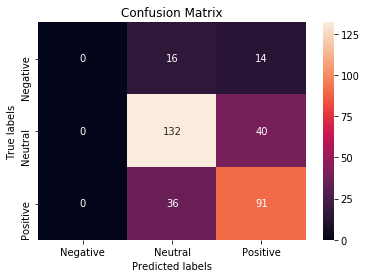

In [45]:
import matplotlib.pyplot as plt     
import seaborn as sns

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Negative','Neutral', 'Positive']); 
ax.yaxis.set_ticklabels(['Negative','Neutral', 'Positive']);

In [46]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.6778115501519757

XGBosst Classifier

In [47]:
from xgboost import XGBClassifier

model = XGBClassifier(max_depth=4, n_estimators=100)
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [48]:
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

C:\Users\nikhi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.6565349544072948

In [63]:
#grid_cv = GridSearchCV(estimator=model, param_grid=params, cv=4)
#grid_cv.fit(x_train, y_train)


In [64]:
#y_pred = grid_cv.predict(x_test)

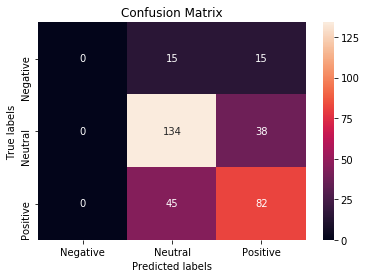

In [49]:
import matplotlib.pyplot as plt     
import seaborn as sns

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Negative','Neutral', 'Positive']); 
ax.yaxis.set_ticklabels(['Negative','Neutral', 'Positive']);

In [50]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        30
          1       0.69      0.78      0.73       172
          2       0.61      0.65      0.63       127

avg / total       0.60      0.66      0.62       329



C:\Users\nikhi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


** Neural Network **

In [51]:
y_train.shape

(1315,)

In [52]:
from keras.utils import to_categorical

y_train = keras.utils.to_categorical(y_train , num_classes=3).astype('float32')
y_test = keras.utils.to_categorical(y_test , num_classes=3).astype('float32')

In [53]:
y_train

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [54]:
y_train.shape

(1315, 3)

In [66]:
from keras.models import Sequential

model = Sequential()

In [56]:
 x_train.shape[1]

3000

In [67]:
model.add(Dense(64, activation='relu',kernel_initializer='uniform', input_shape= (x_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(128, kernel_initializer='uniform',activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, kernel_initializer='uniform',activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(32, kernel_initializer='uniform',activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

#model.compile(optimizer=adam(lr=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=adadelta(lr=0.00001, decay=1e-6), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                192064    
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
__________

In [68]:
history = model.fit(x_train, y_train, validation_split = 0.2, epochs=20, batch_size=2)

Train on 1052 samples, validate on 263 samples
Epoch 1/20
1052/1052 [==============================] - 5s 5ms/step - loss: 1.0986 - acc: 0.3394 - val_loss: 1.0986 - val_acc: 0.3954
Epoch 2/20
1052/1052 [==============================] - 4s 4ms/step - loss: 1.0986 - acc: 0.3764 - val_loss: 1.0986 - val_acc: 0.3992
Epoch 3/20
1052/1052 [==============================] - 4s 4ms/step - loss: 1.0986 - acc: 0.3774 - val_loss: 1.0986 - val_acc: 0.3992
Epoch 4/20
1052/1052 [==============================] - 4s 4ms/step - loss: 1.0986 - acc: 0.3584 - val_loss: 1.0986 - val_acc: 0.3992
Epoch 5/20
1052/1052 [==============================] - 4s 4ms/step - loss: 1.0986 - acc: 0.3679 - val_loss: 1.0986 - val_acc: 0.4030
Epoch 6/20
1052/1052 [==============================] - 4s 4ms/step - loss: 1.0986 - acc: 0.3764 - val_loss: 1.0985 - val_acc: 0.4068
Epoch 7/20
1052/1052 [==============================] - 4s 3ms/step - loss: 1.0986 - acc: 0.3897 - val_loss: 1.0985 - val_acc: 0.4068
Epoch 8/20
1052

In [59]:
model = Sequential()

model.add(Dense(64, activation='relu', input_shape= (x_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

#model.compile(optimizer=adam(lr=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=adam(lr=0.00001, decay=1e-6), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                192064    
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 99        
Total para

In [60]:
history = model.fit(x_train, y_train, validation_split = 0.3, epochs=25, batch_size=5)

Train on 920 samples, validate on 395 samples
Epoch 1/25
920/920 [==============================] - 2s 2ms/step - loss: 1.0999 - acc: 0.3239 - val_loss: 1.0967 - val_acc: 0.4177
Epoch 2/25
920/920 [==============================] - 1s 1ms/step - loss: 1.0964 - acc: 0.3793 - val_loss: 1.0936 - val_acc: 0.4911
Epoch 3/25
920/920 [==============================] - 1s 1ms/step - loss: 1.0934 - acc: 0.4707 - val_loss: 1.0907 - val_acc: 0.4962
Epoch 4/25
920/920 [==============================] - 1s 1ms/step - loss: 1.0902 - acc: 0.4826 - val_loss: 1.0879 - val_acc: 0.5013
Epoch 5/25
920/920 [==============================] - 1s 1ms/step - loss: 1.0881 - acc: 0.4902 - val_loss: 1.0853 - val_acc: 0.5139
Epoch 6/25
920/920 [==============================] - 1s 1ms/step - loss: 1.0855 - acc: 0.5152 - val_loss: 1.0826 - val_acc: 0.5418
Epoch 7/25
920/920 [==============================] - 1s 1ms/step - loss: 1.0819 - acc: 0.5217 - val_loss: 1.0799 - val_acc: 0.5367
Epoch 8/25
920/920 [==========

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


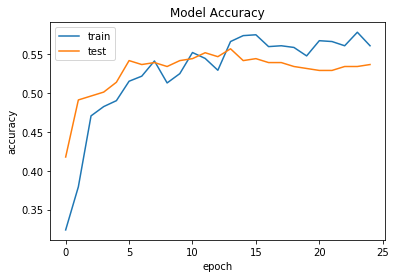

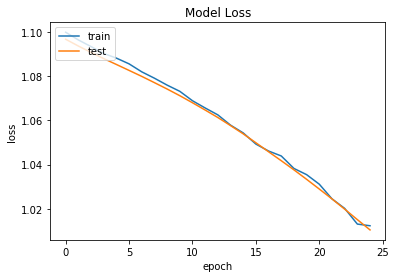

In [61]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [62]:
y_pred = model.predict(x_test)
y_pred

array([[0.25407282, 0.3868342 , 0.35909298],
       [0.26448548, 0.37364727, 0.3618672 ],
       [0.2624839 , 0.38836834, 0.3491477 ],
       [0.2608229 , 0.3793006 , 0.35987654],
       [0.2573367 , 0.38366714, 0.35899612],
       [0.25957248, 0.38532406, 0.35510352],
       [0.2462626 , 0.38412428, 0.36961317],
       [0.26369116, 0.3666565 , 0.36965227],
       [0.26303172, 0.38881722, 0.34815103],
       [0.24819927, 0.3789884 , 0.3728124 ],
       [0.25193217, 0.3763312 , 0.37173662],
       [0.2524682 , 0.37695488, 0.3705769 ],
       [0.2524371 , 0.38950267, 0.35806018],
       [0.25962344, 0.38228798, 0.3580886 ],
       [0.2612547 , 0.38192117, 0.3568241 ],
       [0.25621036, 0.3738441 , 0.36994556],
       [0.25403738, 0.3815987 , 0.364364  ],
       [0.26114553, 0.38545817, 0.35339636],
       [0.25157568, 0.37650517, 0.37191916],
       [0.24696419, 0.37561762, 0.37741825],
       [0.25663656, 0.38558945, 0.35777402],
       [0.25326553, 0.37511435, 0.37162015],
       [0.

In [63]:
y_pred = model.predict_classes(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2,

In [64]:
print(classification_report(y_test.argmax(axis=1), y_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        30
          1       0.56      0.95      0.70       172
          2       0.65      0.19      0.29       127

avg / total       0.54      0.57      0.48       329



C:\Users\nikhi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[]

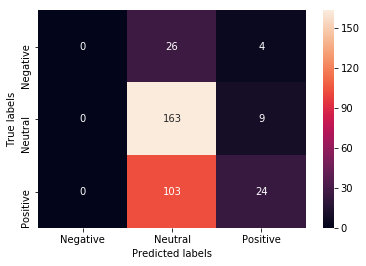

In [65]:
import matplotlib.pyplot as plt     
import seaborn as sns


import seaborn as sns
labels = ['Negative','Neutral', 'Positive']
ax = sns.heatmap(confusion_matrix(y_test.argmax(axis=1), y_pred), annot=True, xticklabels=labels, yticklabels=labels, fmt='g')
ax.set(xlabel='Predicted labels', ylabel='True labels')
ax.plot()
